<a href="https://colab.research.google.com/github/am5nj/Hotel-reservations-/blob/main/hotel_reservtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

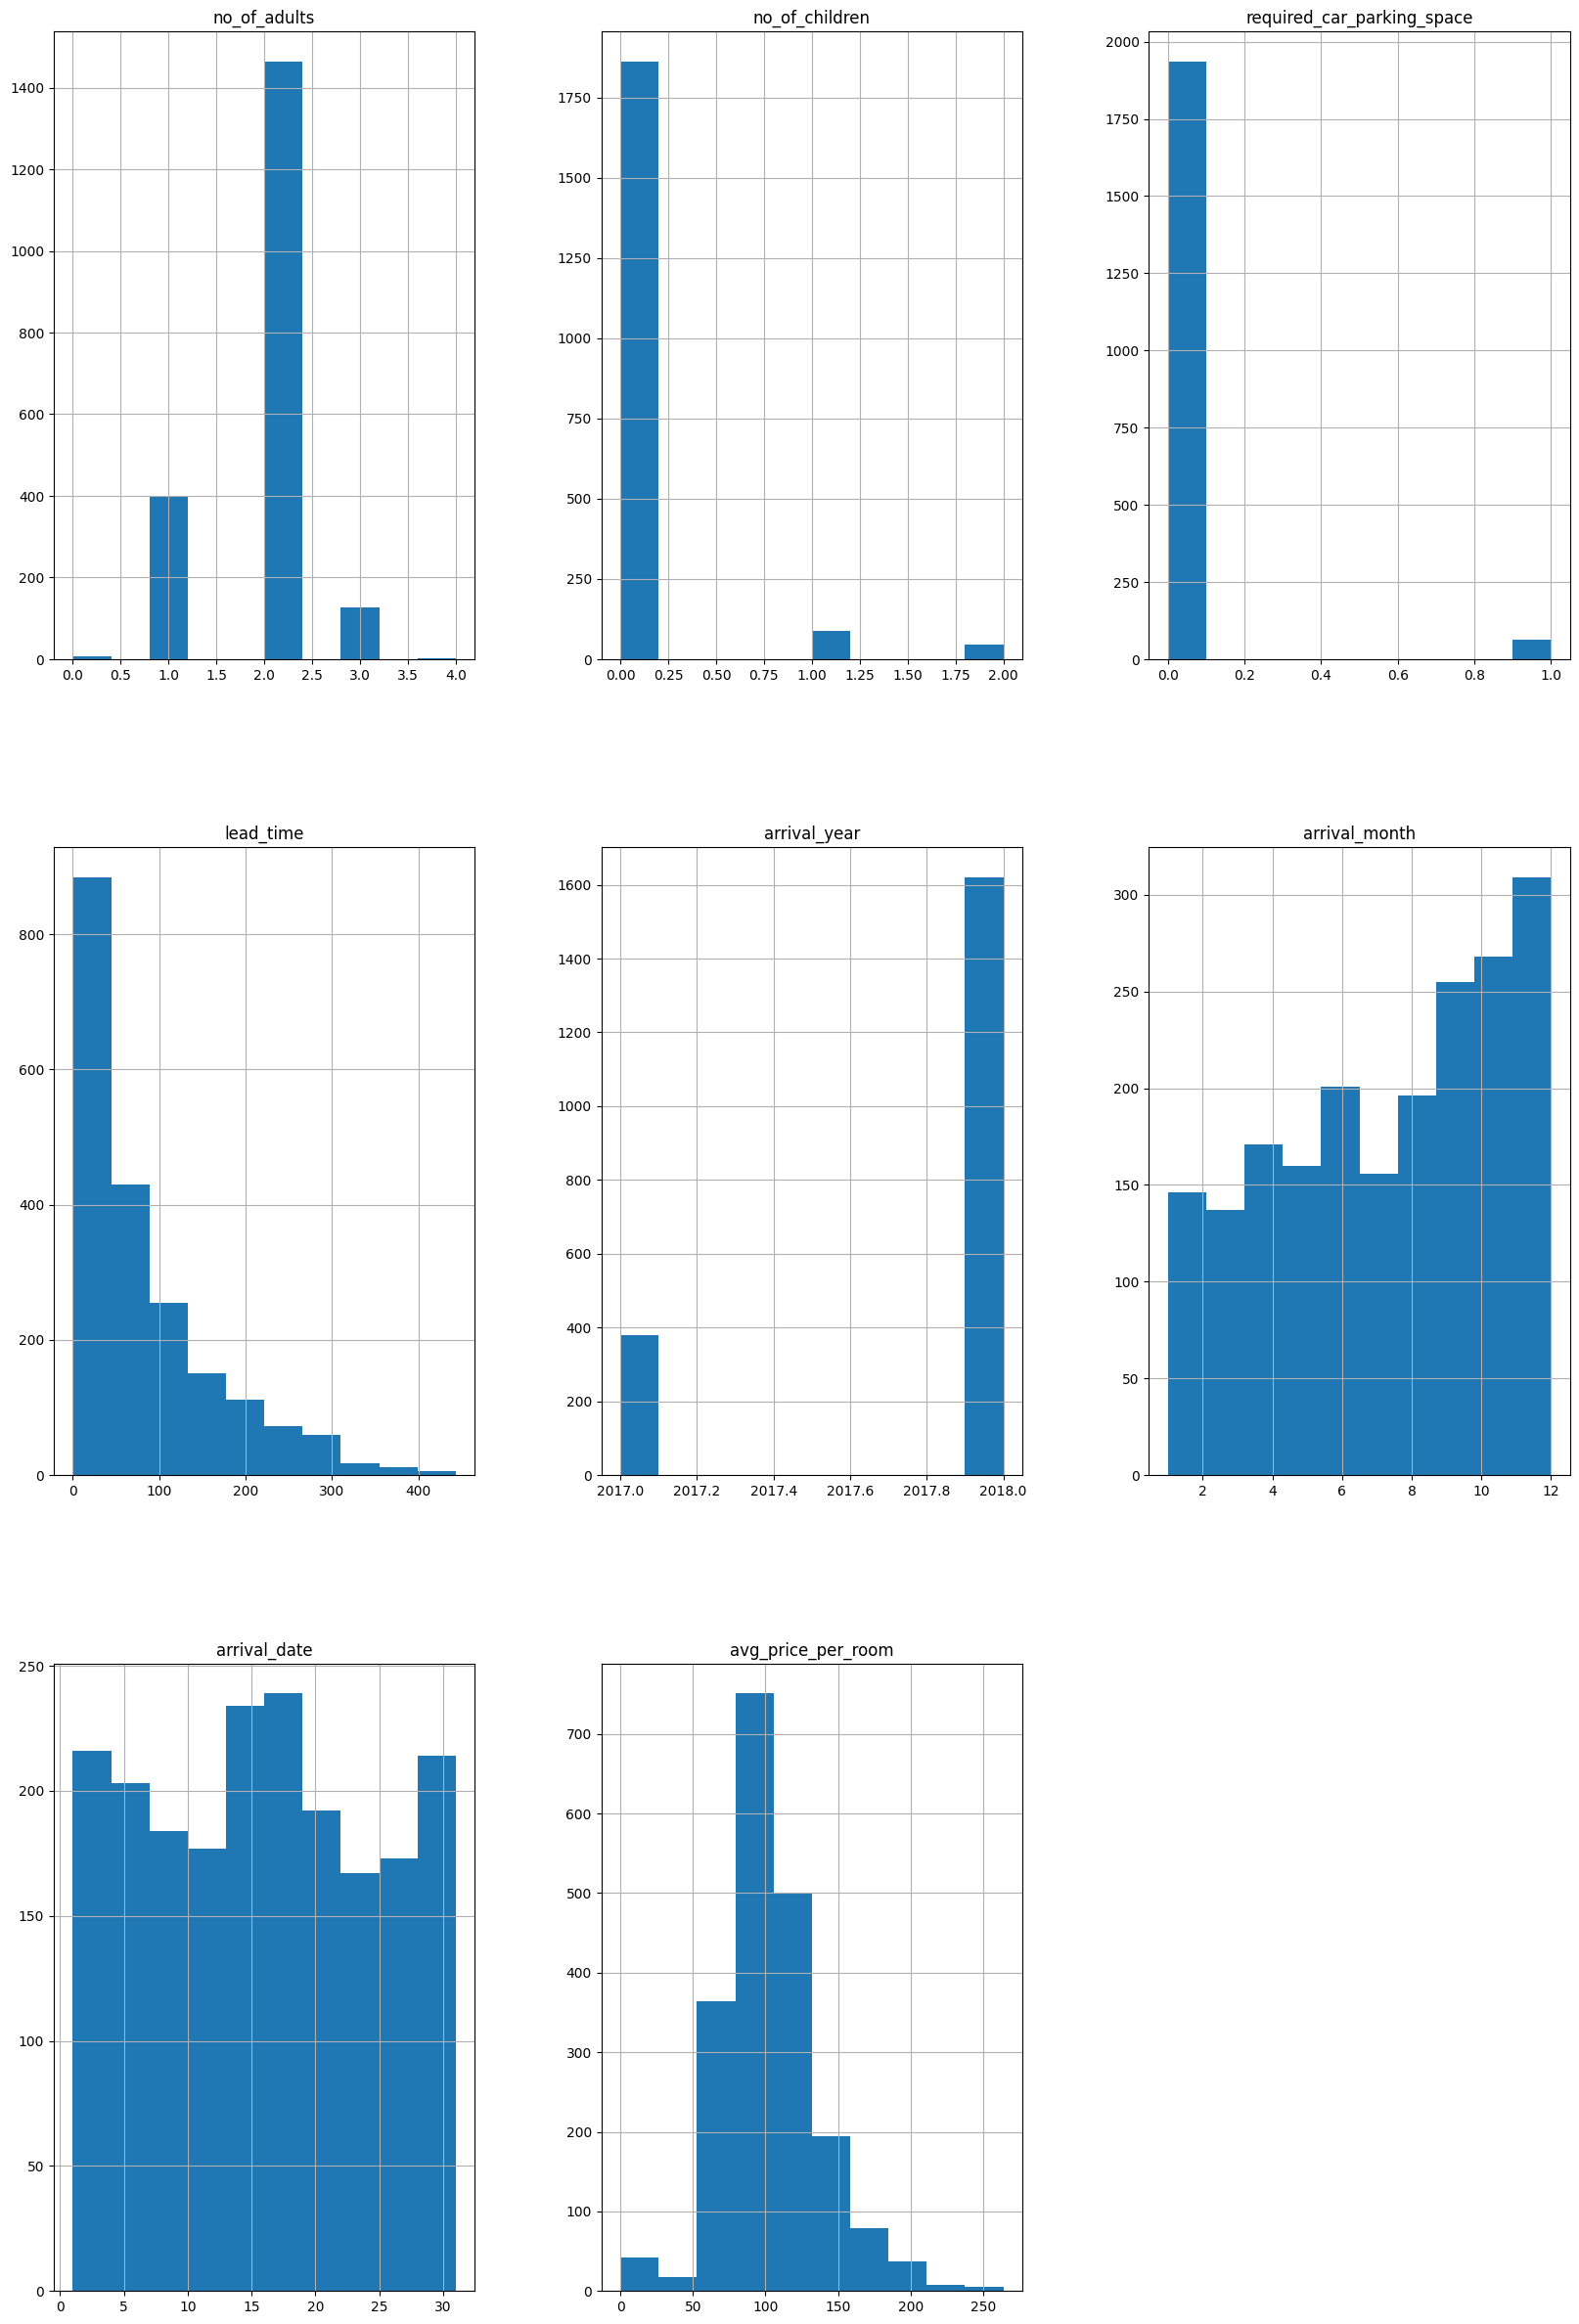

In [ ]:
# Load the Cardio Dataset
url = 'https://raw.githubusercontent.com/am5nj/Hotel-reservations-/main/Hotel.csv'
mydata = pd.read_csv(url)

# mydata = pd.read_csv('/Hotel.csv')
#matplotlib inline

mydata.hist(figsize=(20,30))


<Axes: xlabel='no_of_adults', ylabel='count'>

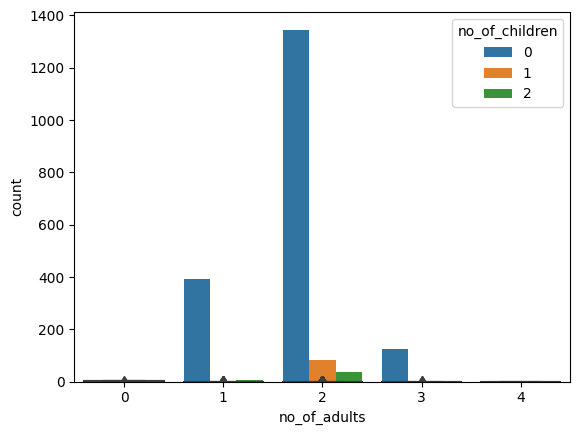

In [ ]:
sns.boxplot(x="no_of_adults", y="no_of_children", data=mydata)

pd.crosstab(mydata['no_of_adults'],mydata['no_of_children'] )
sns.countplot(x="no_of_adults", hue="no_of_children", data=mydata)

In [ ]:
pd.pivot_table(mydata, index=['arrival_year', 'arrival_month'],
                     columns=[ 'arrival_date'], aggfunc=len)

Booking_ID                                     \
arrival_date                       1     2     3     4    5     6     7    
arrival_year arrival_month                                                 
2017         7                    5.0   NaN   NaN   NaN  1.0   1.0   3.0   
             8                    2.0   NaN   1.0   NaN  5.0   1.0   NaN   
             9                    1.0   2.0   3.0  11.0  3.0   1.0   3.0   
             10                   4.0  11.0   1.0   3.0  4.0   5.0   4.0   
             11                   1.0   3.0   2.0   1.0  1.0   5.0   NaN   
             12                   1.0   NaN   1.0   2.0  4.0   2.0   1.0   
2018         1                    NaN   8.0   2.0   1.0  NaN   2.0   1.0   
             2                    2.0   NaN   3.0   2.0  4.0   3.0   2.0   
             3                    3.0   5.0   3.0   8.0  6.0   2.0   5.0   
             4                    9.0   3.0   4.0   6.0  5.0  13.0   4.0   
             5                    9.0   7.0   3.0   4.0  6.0   4.0   4.0   
             6                    1.0   6.0   6.0   4.0  3.0  10.0   6.0   
             7                    4.0   4.0   4.0   2.0  4.0   6.0   5.0   
             8                    7.0   3.0   7.0   4.0  NaN   2.0   2.0   
             9                    6.0   6.0   7.0   5.0  5.0   5.0  10.0   
             10                   6.0   5.0  10.0   6.0  2.0   3.0   4.0   
             11                  10.0   3.0   8.0   8.0  4.0   5.0   5.0   
             12                   1.0   9.0   4.0   2.0  5.0   2.0   3.0   

                                            ... type_of_meal_plan             \
arrival_date                  8    9    10  ...                22   23    24   
arrival_year arrival_month                  ...                                
2017         7               NaN  NaN  NaN  ...               NaN  1.0   NaN   
             8               3.0  1.0  3.0  ...               3.0  1.0   NaN   
             9               2.0  5.0  5.0  ...               4.0  NaN   2.0   
             10              2.0  4.0  5.0  ...               1.0  4.0   2.0   
             11              2.0  2.0  1.0  ...               NaN  1.0   NaN   
             12              NaN  3.0  3.0  ...               1.0  NaN   1.0   
2018         1               5.0  1.0  NaN  ...               NaN  NaN   1.0   
             2               3.0  1.0  NaN  ...               5.0  1.0   3.0   
             3               7.0  2.0  4.0  ...               2.0  8.0   6.0   
             4               8.0  7.0  4.0  ...               8.0  5.0   8.0   
             5               2.0  7.0  5.0  ...               7.0  1.0   7.0   
             6              10.0  3.0  8.0  ...               2.0  5.0  14.0   
             7               2.0  5.0  4.0  ...               2.0  5.0   1.0   
             8               5.0  3.0  9.0  ...               9.0  NaN   6.0   
             9               3.0  4.0  1.0  ...               5.0  1.0   NaN   
             10              1.0  1.0  5.0  ...               3.0  8.0   2.0   
             11              2.0  3.0  2.0  ...               3.0  3.0   NaN   
             12             10.0  3.0  2.0  ...               7.0  5.0   3.0   

                                                                
arrival_date                 25   26   27    28   29   30   31  
arrival_year arrival_month                                      
2017         7              5.0  NaN  1.0   NaN  NaN  NaN  NaN  
             8              2.0  1.0  3.0   1.0  1.0  1.0  NaN  
             9              3.0  NaN  NaN   1.0  3.0  7.0  NaN  
             10             2.0  NaN  NaN   1.0  2.0  3.0  1.0  
             11             NaN  NaN  NaN   1.0  NaN  1.0  NaN  
             12             NaN  3.0  3.0   NaN  7.0  4.0  4.0  
2018         1              2.0  NaN  4.0   3.0  1.0  1.0  1.0  
             2              5.0  5.0  5.0  12.0  NaN  NaN  NaN  
             3              9.0  2

In [ ]:
pd.pivot_table(mydata,'avg_price_per_room', index=['arrival_year', 'arrival_month'],
                     columns=[ 'arrival_date'])

arrival_date                        1           2           3           4   \
arrival_year arrival_month                                                   
2017         7               90.500000         NaN         NaN         NaN   
             8               94.500000         NaN    0.000000         NaN   
             9              105.000000   65.765000   92.750000  100.000909   
             10              75.025000   86.672727   74.150000   86.000000   
             11              90.400000   86.650000   85.475000   70.000000   
             12              69.000000         NaN   58.000000   72.635000   
2018         1                     NaN   71.605000   73.000000  106.000000   
             2               86.000000         NaN   70.766667   70.130000   
             3               76.943333   78.760000   83.200000   93.870000   
             4               89.390000   77.390000   86.017500   90.825000   
             5              117.994444  112.957143  126.373333  118.215000   
             6                0.000000  124.788333  111.641667   77.887500   
             7              101.590000  147.100000  103.950000  138.150000   
             8              113.908571   92.030000  132.504286  103.237500   
             9              116.375000  126.080000  114.641429  106.924000   
             10             111.341667  120.200000  101.695000  111.733333   
             11              96.080000  108.740000   91.012500   88.375000   
             12              66.290000   97.874444   90.472500   99.100000   

arrival_date                        5           6           7           8   \
arrival_year arrival_month                                                   
2017         7               49.740000   68.000000   54.003333         NaN   
             8               72.500000   81.000000         NaN   88.500000   
             9              107.333333   29.000000  110.700000  131.000000   
             10              98.850000   89.906000   86.442500   89.875000   
             11             105.500000   81.756000         NaN   86.360000   
             12              88.497500   71.250000   60.000000         NaN   
2018         1                     NaN   87.500000   77.250000   68.276000   
             2               83.725000   75.766667   68.355000   94.066667   
             3               74.935000   53.210000   87.620000   73.761429   
             4               99.462000  101.836923  127.300000   82.043750   
             5              119.605000  112.500000  137.287500   82.235000   
             6              111.400000  101.400000  126.500000  112.190000   
             7               83.430000  109.226667  139.426000  139.800000   
             8                     NaN   99.900000   85.850000  142.870000   
             9               99.668000  121.640000  113.368000  104.560000   
             10             123.750000   76.666667  146.150000  170.400000   
             11             145.000000  152.148000  165.308000  109.440000   
             12              78.280000   96.500000   86.180000   86.498000   

arrival_date                        9           10  ...          22  \
arrival_year arrival_month                          ...               
2017         7                     NaN         NaN  ...         NaN   
             8              105.000000   91.500000  ...   76.486667   
             9               87.020000   72.950000  ...  113.017500   
             10             135.415000   69.334000  ...   89.250000   
             11              75.500000   40.000000  ...         NaN   
             12             101.933333    0.000000  ...   58.000000   
2018         1               69.500000         NaN  ...         NaN   
             2               65.330000         NaN  ...   87.350000   
             3               90.275000   78.987500  ...   83.650000   
             4              106.871429   88.617500  ...  112.607500   
             5            

In [ ]:
pd.pivot_table(mydata,'arrival_date', index=['arrival_year', 'arrival_month'],
                     columns=[ 'avg_price_per_room'])

avg_price_per_room             0.00    1.00    2.00    6.00    6.50    6.67    \
arrival_year arrival_month                                                      
2017         7                    NaN     NaN     NaN     NaN     NaN     NaN   
             8              15.750000     NaN     NaN     NaN     NaN     NaN   
             9              10.000000     NaN     NaN     NaN     NaN     NaN   
             10             10.333333     NaN     NaN     NaN     NaN     NaN   
             11             30.000000     NaN     NaN     NaN     NaN     NaN   
             12             15.250000     NaN     NaN     NaN     NaN     NaN   
2018         1              23.500000     2.0     NaN     NaN     NaN    14.0   
             2              21.000000     NaN    26.0     NaN    28.0     NaN   
             3              21.000000     8.0     NaN    25.0     NaN     NaN   
             4              12.000000     NaN     NaN     NaN     NaN     NaN   
             5              15.000000     NaN     NaN     NaN     NaN     NaN   
             6              13.250000     NaN     NaN     NaN     NaN     NaN   
             7               5.000000     NaN     NaN     NaN     NaN     NaN   
             8              19.500000     NaN     NaN     NaN     NaN     NaN   
             9              18.000000     NaN     NaN     NaN     NaN     NaN   
             10             13.500000     NaN     NaN     NaN     NaN     NaN   
             11             19.000000     NaN     NaN     NaN     NaN     NaN   
             12                   NaN     NaN     NaN     NaN     NaN     NaN   

avg_price_per_room          20.00   29.00   37.33   38.67   ...  215.60  \
arrival_year arrival_month                                  ...           
2017         7                 NaN     NaN     7.0     NaN  ...     NaN   
             8                 NaN     NaN     NaN     NaN  ...     NaN   
             9                 NaN     6.0     NaN     NaN  ...     NaN   
             10                NaN     NaN     NaN     NaN  ...     NaN   
             11                NaN     NaN     6.0     NaN  ...     NaN   
             12                NaN     NaN     NaN     NaN  ...     NaN   
2018         1                 NaN     NaN     NaN     NaN  ...     NaN   
             2                 NaN     NaN     NaN     NaN  ...     NaN   
             3                 NaN     NaN     NaN    21.0  ...     NaN   
             4                 NaN     NaN     NaN     NaN  ...     NaN   
             5                 NaN     NaN     NaN     NaN  ...     NaN   
             6                 NaN     NaN     NaN     NaN  ...     NaN   
             7                 NaN     NaN     NaN     NaN  ...     NaN   
             8                 NaN     NaN     NaN     NaN  ...     NaN   
             9                 NaN     NaN     NaN     NaN  ...     NaN   
             10                NaN     NaN     NaN     NaN  ...     7.0   
             11               25.0     NaN     NaN     NaN  ...     NaN   
             12                NaN     NaN     NaN     NaN  ...     NaN   

avg_price_per_room          219.60  221.00  228.60  233.33  239.00  240.00  \
arrival_year arrival_month                                                   
2017         7                 NaN     NaN     NaN     NaN     NaN     NaN   
             8                 NaN     NaN     NaN     NaN     NaN     NaN   
             9                 NaN     NaN     NaN     NaN     NaN     NaN   
             10                NaN     NaN     NaN     NaN     NaN     NaN   
             11                NaN     NaN     NaN     NaN     NaN     NaN   
             12                NaN     NaN     NaN     NaN     NaN     NaN   
2018         1                 NaN     NaN     NaN     NaN     NaN     NaN   
             2                 NaN     NaN     NaN     NaN     NaN     NaN   
             3                 NaN     NaN     NaN     NaN     NaN     NaN   
             4      

<ipython-input-14-5c316afd1bc6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['arrival_date'])


<Axes: >

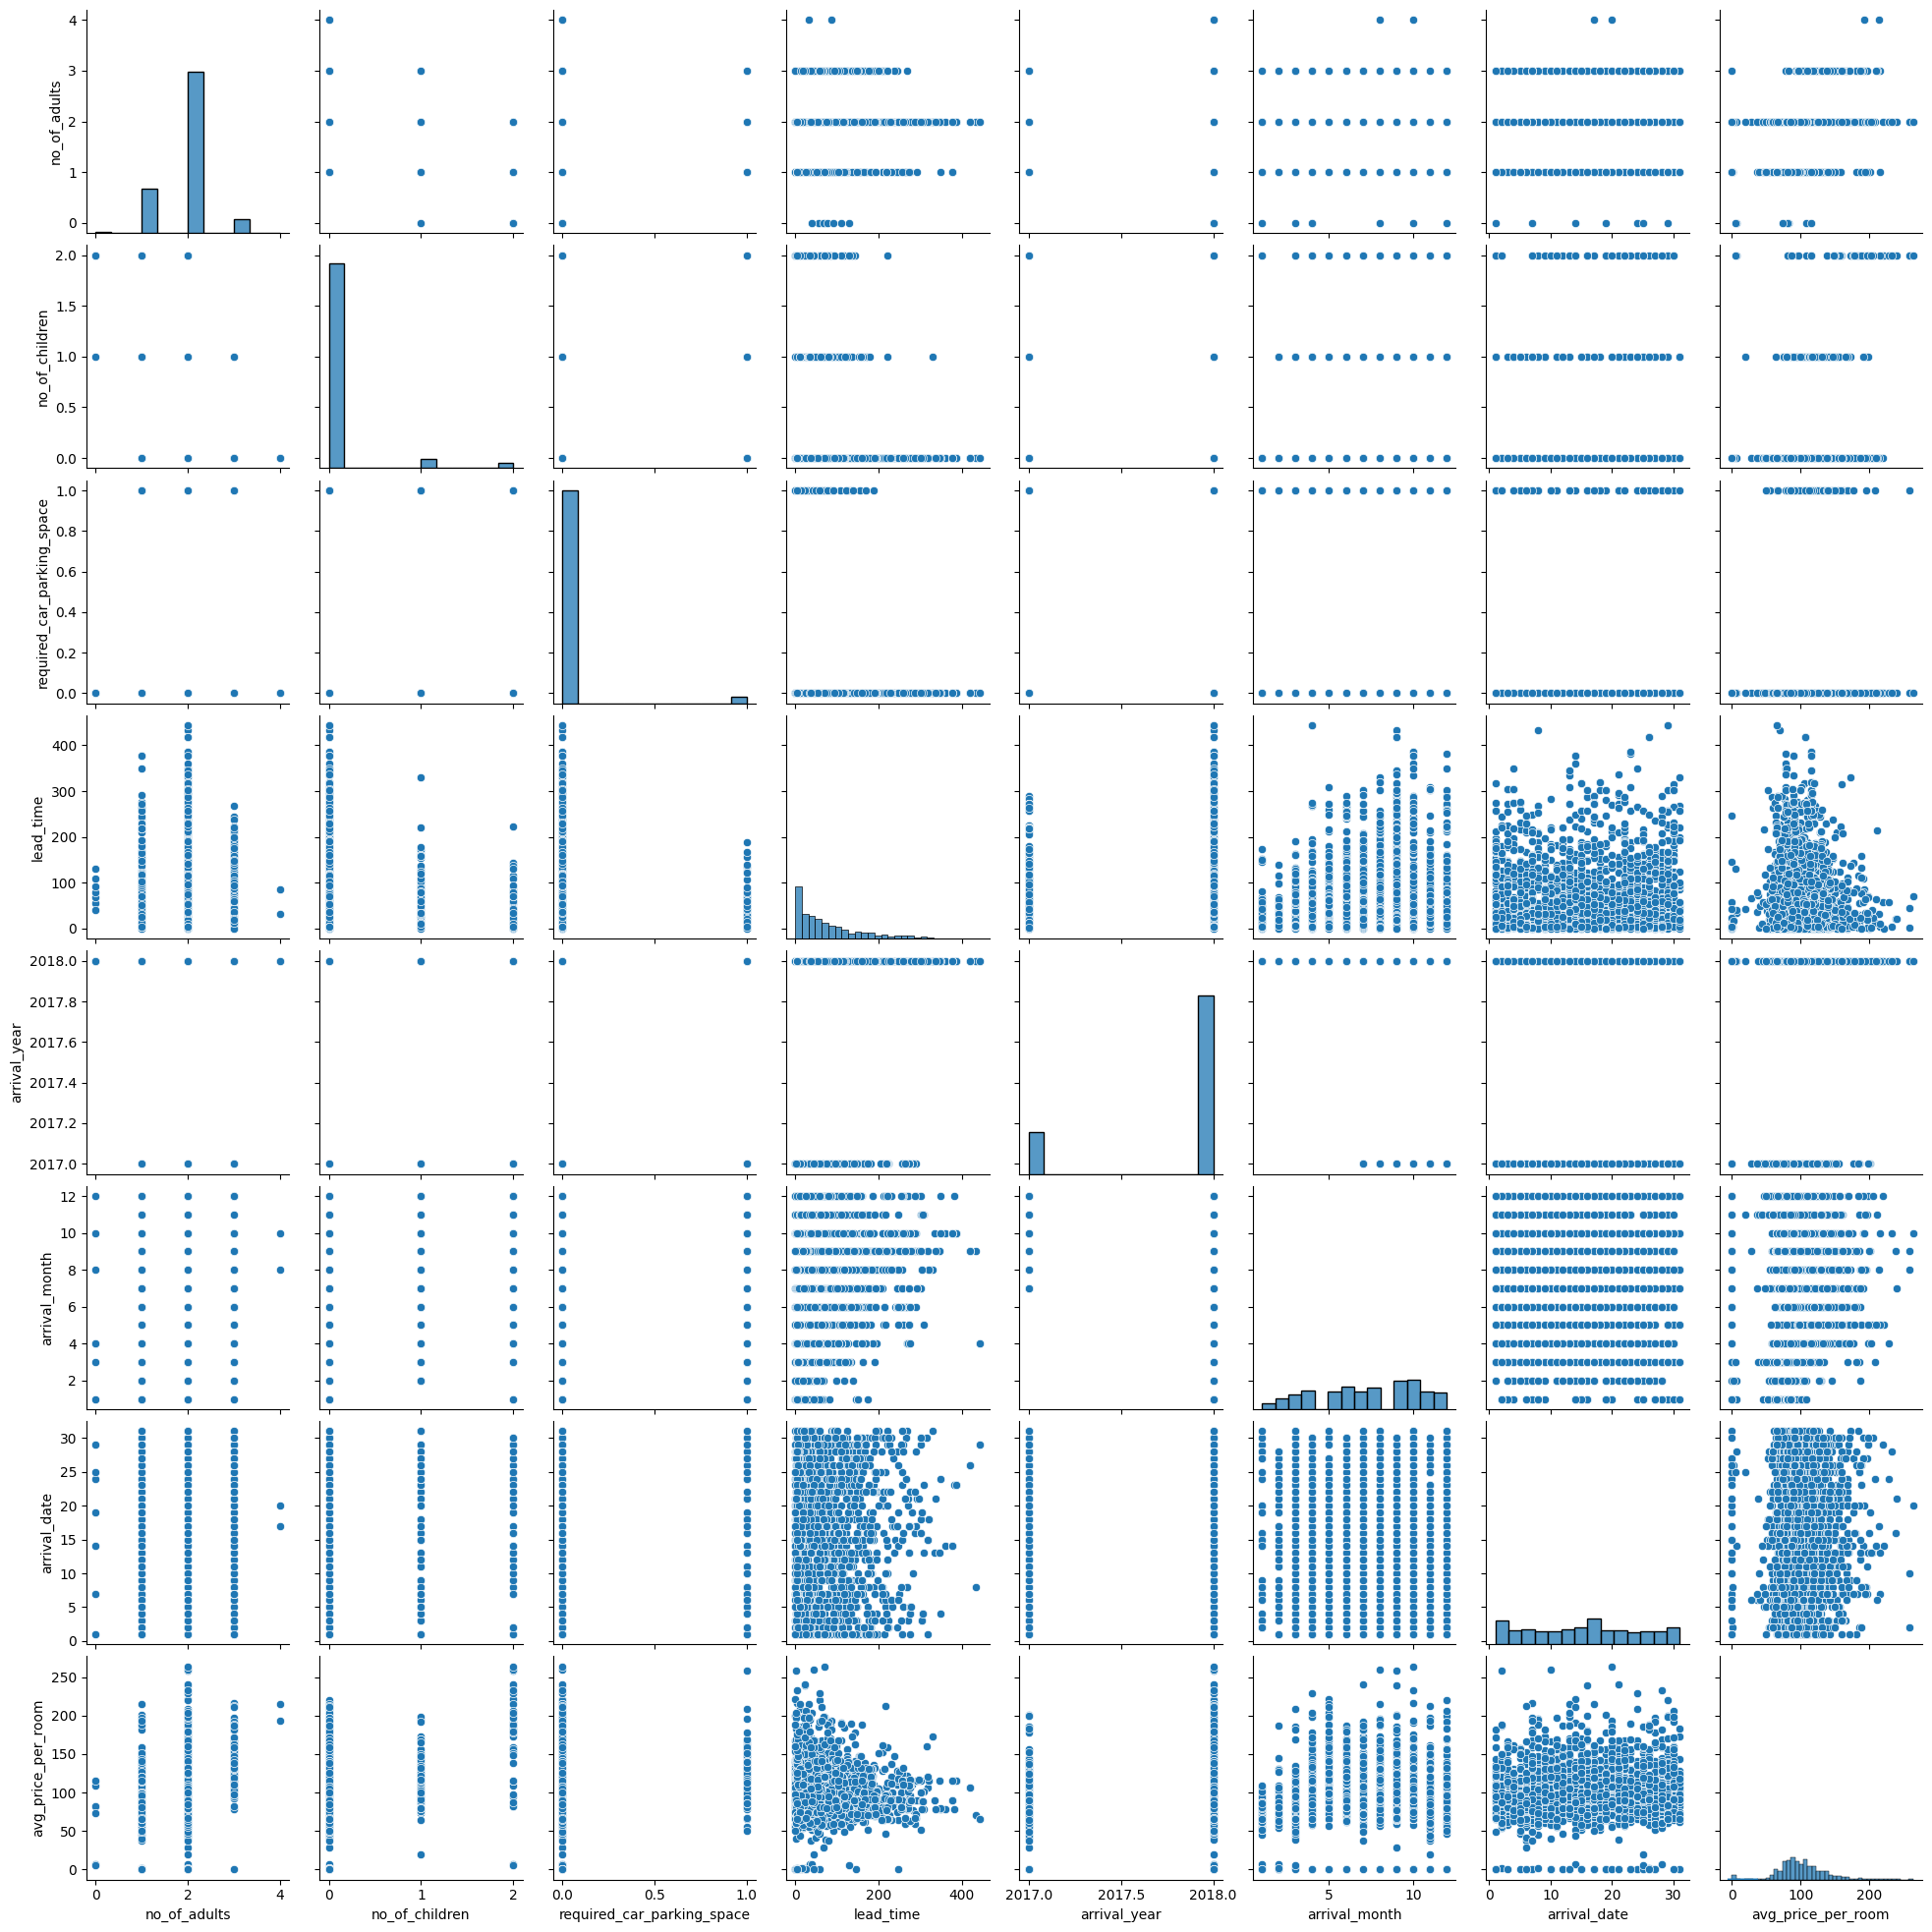

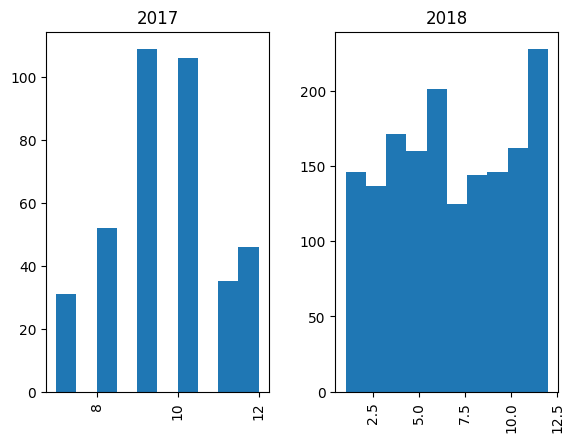

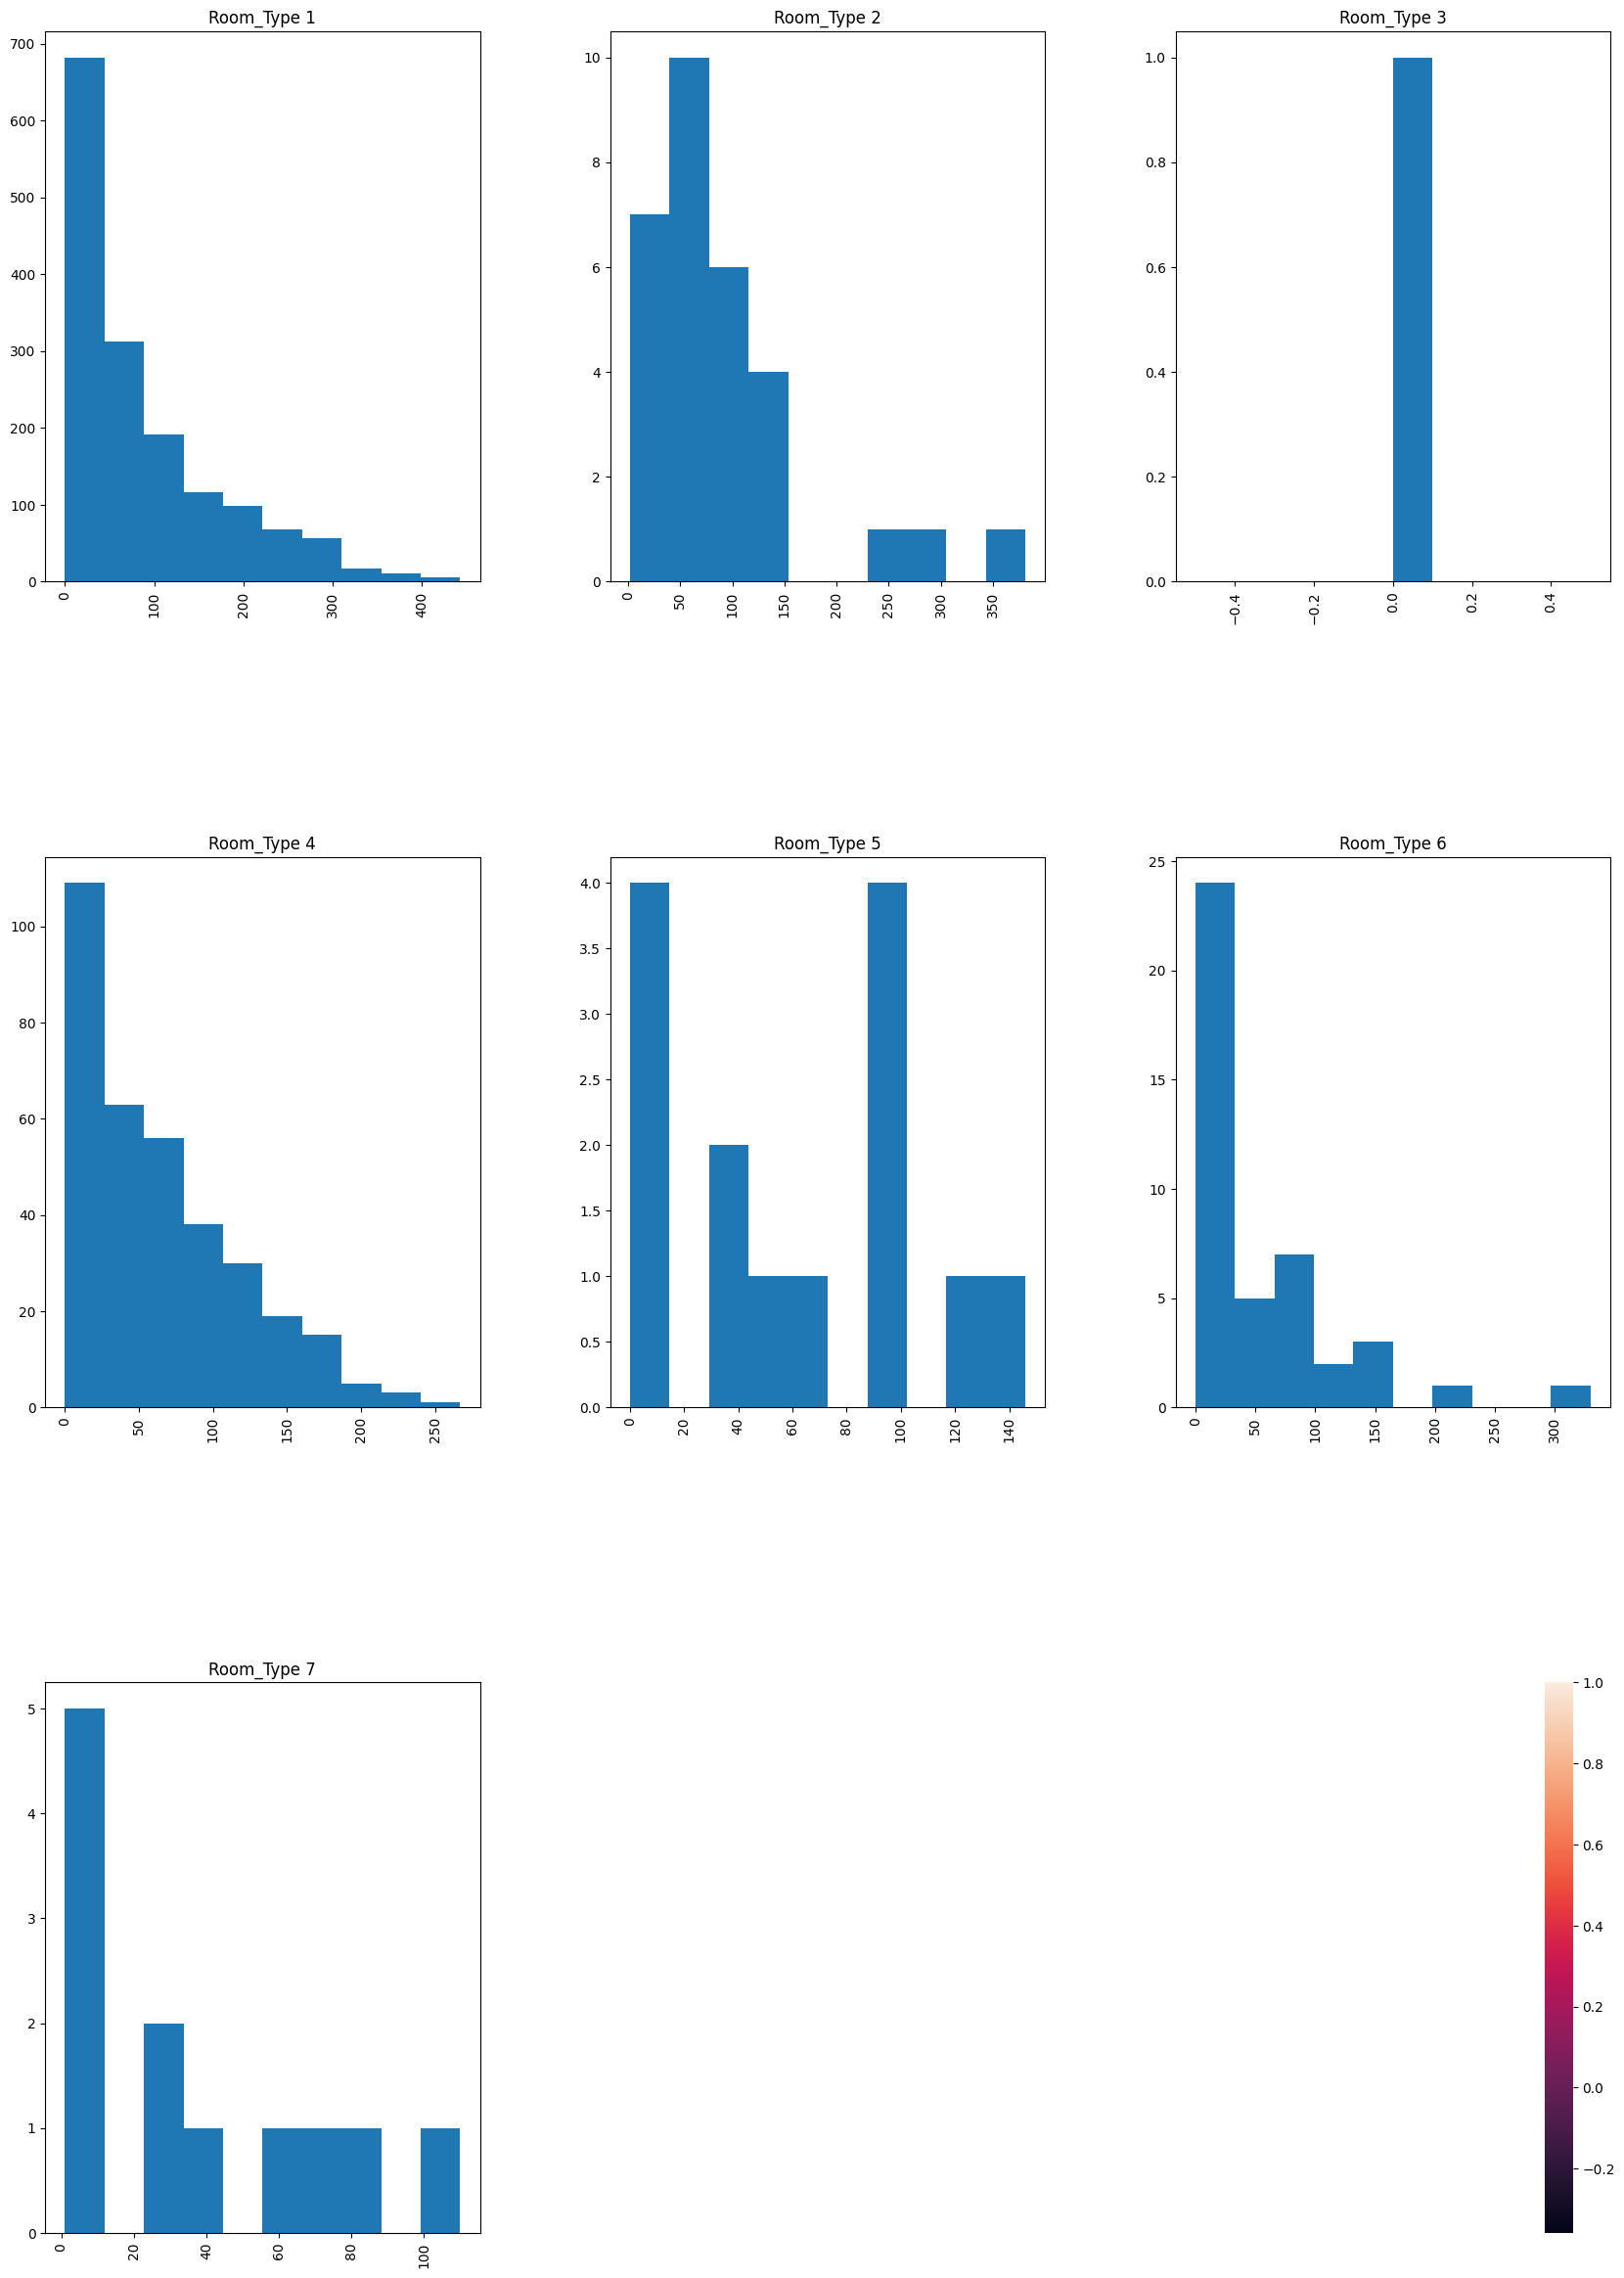

In [ ]:
sns.pairplot(mydata)

mydata['arrival_date'].mean()

sns.distplot(mydata['arrival_date'])

mydata.hist(by='arrival_year',column = 'arrival_month')

mydata.hist(by='room_type_reserved',column = 'lead_time', figsize=(20,30))

corr = mydata.corr()

sns.heatmap(corr, annot=True)

In [2]:

np.random.seed(42)

x = st.skewnorm.rvs(-5, size=100000)

NameError: name 'np' is not defined

In [ ]:
xbar = x.mean()
xbar

In [ ]:
 fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgreen')

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

In [ ]:
np.median(x) 

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [ ]:
x.var()